<a href="https://colab.research.google.com/github/kiranreddigari/Best_Streaming_Analysis/blob/master/Streaming_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving MoviesOnStreamingPlatforms_updated.csv to MoviesOnStreamingPlatforms_updated.csv


In [ ]:
import pandas as pd
import numpy as np
import plotly
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tv_shows=pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
tv_shows.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
tv_shows.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [ ]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [ ]:
tv_shows.drop_duplicates(subset='Title',keep='first',inplace=True)

In [ ]:
tv_shows['Rotten Tomatoes']=tv_shows['Rotten Tomatoes'].fillna('0%')
tv_shows['Rotten Tomatoes']=tv_shows['Rotten Tomatoes'].apply(lambda x:x.rstrip('%'))
tv_shows['Rotten Tomatoes']=pd.to_numeric(tv_shows['Rotten Tomatoes'])

In [ ]:
tv_shows['IMDb']=tv_shows['IMDb'].fillna(0)
tv_shows['IMDb']=tv_shows['IMDb']*10
tv_shows['IMDb']=tv_shows['IMDb'].astype('int')

In [ ]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Prime Video','Disney+']],id_vars=['Title'],var_name='StreamingOn',value_name='Present')
tv_shows_long=tv_shows_long[tv_shows_long['Present']==1]
tv_shows_long.drop(columns=['Present'],inplace=True)


In [ ]:
tv_shows_combined=tv_shows_long.merge(tv_shows,on='Title',how='inner')

In [ ]:
tv_shows_combined.head()

,Title,StreamingOn,Unnamed: 0,ID,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,Netflix,0,1,2010,13+,88,87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,Netflix,1,2,1999,18+,87,87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,Netflix,2,3,2018,13+,85,84,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,Netflix,3,4,1985,7+,85,96,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",Netflix,4,5,1966,18+,88,97,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
tv_shows_combined.drop(columns = ['Unnamed: 0','Netflix','Hulu', 'Prime Video', 'Disney+', 'Type'], inplace=True)

In [ ]:
tv_shows_combined.head()

,Title,StreamingOn,ID,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Inception,Netflix,1,2010,13+,88,87,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,Netflix,2,1999,18+,87,87,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,Netflix,3,2018,13+,85,84,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,Netflix,4,1985,7+,85,96,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",Netflix,5,1966,18+,88,97,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
tv_shows_both_ratings= tv_shows_combined[(tv_shows_combined.IMDb > 0) & tv_shows_combined['Rotten Tomatoes'] > 0]

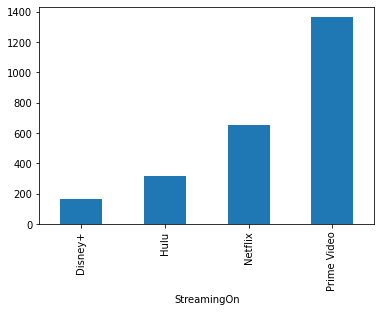

In [ ]:
tv_shows_both_ratings.groupby('StreamingOn').Title.count().plot(kind='bar')

In [ ]:
import plotly.express as px
figure = []
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)        
fig.show()

In [ ]:
px.scatter(tv_shows_both_ratings,x='IMDb',y='Rotten Tomatoes',color='StreamingOn')